In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from imblearn.over_sampling import RandomOverSampler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Career Rec System\Plan B AI\Model Training\career dataset.csv")
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
data.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

In [5]:
data.shape

(20000, 39)

In [6]:
academic_columns = [
    'percentage in Algorithms',
    'Percentage in Programming Concepts',
    'Percentage in Software Engineering',
    'Percentage in Computer Networks',
    'Percentage in Electronics Subjects',
    'Percentage in Computer Architecture',
    'Percentage in Mathematics',
    'Percentage in Communication skills',
    'Acedamic percentage in Operating Systems'  
]

data.columns = data.columns.str.strip()

data['Total CGPA'] = data[academic_columns].mean(axis=1) / 10  # CGPA scale out of 10

cols = list(data.columns)
cols.insert(0, cols.pop(cols.index('Total CGPA')))
data = data[cols]

# Show the updated DataFrame
print(data.head())

   Total CGPA  Acedamic percentage in Operating Systems  \
0    7.966667                                        69   
1    7.355556                                        78   
2    7.944444                                        71   
3    7.644444                                        76   
4    7.644444                                        92   

   percentage in Algorithms  Percentage in Programming Concepts  \
0                        63                                  78   
1                        62                                  73   
2                        86                                  91   
3                        87                                  60   
4                        62                                  90   

   Percentage in Software Engineering  Percentage in Computer Networks  \
0                                  87                               94   
1                                  60                               71   
2                   

In [7]:
data.drop(columns=academic_columns, inplace=True)
data.head()

,Total CGPA,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,7.966667,9,4,0,4,8,yes,yes,yes,shell programming,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,7.355556,12,7,1,2,3,yes,no,yes,machine learning,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,7.944444,11,1,4,1,3,yes,no,yes,app development,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,7.644444,7,1,1,2,5,no,yes,no,python,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,7.644444,4,5,4,6,3,no,no,no,app development,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [35]:
drop_col=[
    'Hours working per day',
    'Extra-courses did',
    'workshops',
    'talenttests taken?',
    'olympiads',
    'Taken inputs from seniors or elders',
    'In a Realtionship?',
    'Salary/work',
    'hard/smart worker'
]
cols_to_drop = [col for col in drop_col if col in data.columns]

data = data.drop(columns=cols_to_drop)

In [36]:
data.iloc[:,:9]

,Total CGPA,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,certifications,reading and writing skills
0,7.966667,4,0,4,8,yes,yes,shell programming,excellent
1,7.355556,7,1,2,3,yes,no,machine learning,poor
2,7.944444,1,4,1,3,yes,no,app development,poor
3,7.644444,1,1,2,5,no,yes,python,medium
4,7.644444,5,4,6,3,no,no,app development,poor
...,...,...,...,...,...,...,...,...,...
19995,7.477778,2,6,1,8,yes,no,app development,poor
19996,7.688889,8,0,9,8,yes,no,full stack,medium
19997,8.000000,3,6,2,3,yes,yes,information security,medium
19998,7.588889,1,4,9,5,no,no,full stack,poor


In [37]:
data.head()

,Total CGPA,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,certifications,reading and writing skills,memory capability score,...,Job/Higher Studies?,Type of company want to settle in?,interested in games,Interested Type of Books,Salary Range Expected,Gentle or Tuff behaviour?,Management or Technical,worked in teams ever?,Introvert,Suggested Job Role
0,7.966667,4,0,4,8,yes,yes,shell programming,excellent,excellent,...,higherstudies,Web Services,no,Prayer books,salary,stubborn,Management,yes,no,Database Developer
1,7.355556,7,1,2,3,yes,no,machine learning,poor,medium,...,job,SAaS services,yes,Childrens,salary,gentle,Technical,no,yes,Portal Administrator
2,7.944444,1,4,1,3,yes,no,app development,poor,excellent,...,higherstudies,Sales and Marketing,yes,Travel,Work,stubborn,Management,no,yes,Portal Administrator
3,7.644444,1,1,2,5,no,yes,python,medium,excellent,...,higherstudies,Testing and Maintainance Services,no,Romance,Work,gentle,Management,yes,yes,Systems Security Administrator
4,7.644444,5,4,6,3,no,no,app development,poor,excellent,...,higherstudies,product development,yes,Cookbooks,salary,stubborn,Management,yes,yes,Business Systems Analyst


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Total CGPA                          20000 non-null  float64
 1   Logical quotient rating             20000 non-null  int64  
 2   hackathons                          20000 non-null  int64  
 3   coding skills rating                20000 non-null  int64  
 4   public speaking points              20000 non-null  int64  
 5   can work long time before system?   20000 non-null  object 
 6   self-learning capability?           20000 non-null  object 
 7   certifications                      20000 non-null  object 
 8   reading and writing skills          20000 non-null  object 
 9   memory capability score             20000 non-null  object 
 10  Interested subjects                 20000 non-null  object 
 11  interested career area              20000

In [39]:
data.describe()

,Total CGPA,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.699341,4.995050,2.992650,5.004750,5.012800
std,0.336931,2.578383,2.005791,2.576831,2.588875
min,6.444444,1.000000,0.000000,1.000000,1.000000
25%,7.466667,3.000000,1.000000,3.000000,3.000000
50%,7.700000,5.000000,3.000000,5.000000,5.000000
75%,7.933333,7.000000,5.000000,7.000000,7.000000
max,8.922222,9.000000,6.000000,9.000000,9.000000


In [40]:
for i in range(0,data.shape[1]):
    print("------------------------------------------")
    print("Unique values for " + data.columns[i])
    print("Number of Unique Values: ",len(np.unique(data.iloc[:,i])))
    print("------------------------------------------")
    print(data.iloc[:,i].unique())

------------------------------------------
Unique values for Total CGPA
Number of Unique Values:  205
------------------------------------------
[7.96666667 7.35555556 7.94444444 7.64444444 7.93333333 7.41111111
 7.48888889 7.46666667 7.85555556 7.91111111 6.6        7.72222222
 7.25555556 6.96666667 7.63333333 7.2        8.01111111 7.62222222
 7.53333333 6.91111111 7.36666667 7.87777778 8.38888889 7.77777778
 8.02222222 8.2        7.84444444 8.18888889 7.74444444 7.24444444
 7.47777778 7.65555556 7.55555556 7.31111111 7.76666667 8.16666667
 7.16666667 7.71111111 7.37777778 8.04444444 7.27777778 7.78888889
 7.81111111 7.06666667 7.58888889 7.45555556 8.1        6.97777778
 8.15555556 7.7        7.68888889 7.38888889 7.6        7.73333333
 7.34444444 8.03333333 8.26666667 7.75555556 8.36666667 7.43333333
 8.06666667 8.11111111 7.97777778 7.56666667 7.07777778 7.42222222
 7.51111111 7.98888889 7.18888889 8.23333333 7.08888889 7.32222222
 7.14444444 7.21111111 7.1        7.26666667 7.8   

In [41]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.shape

(20000, 21)

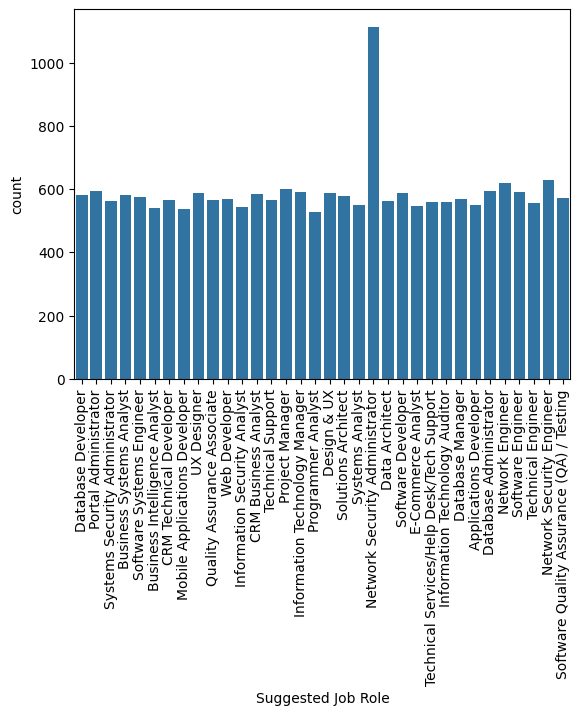

In [42]:
chart = sns.countplot(x=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [43]:
warnings.filterwarnings("ignore")

###### OneHotEncoding the X data

In [45]:
X = OneHotEncoder().fit_transform(x)
Y = y.copy(deep=True)

In [46]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 420000 stored elements and shape (20000, 329)>

In [48]:
X2 = StandardScaler(with_mean=False).fit_transform(X)
y2 = y.copy(deep=True)
X2.shape

(20000, 329)

Now transforming data as shown under:

* 'Solutions Architect'  'Data Architect' 'Information Technology Auditor' --> others
* 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
* 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst 
* 'Mobile Applications Developer' 'Web Developer''Applications Developer'   --> Mobile Applications/ Web Development
* 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
* 'UX Designer' 'Design & UX' --> UX/Design
* 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
* 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
* 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
* 'Software Engineer' 'Software Developer' --> SE/SDE
* 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

In [49]:
y_trans = y.copy(deep=True)
y_trans

0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

###### LabelEncoding the Y data

In [50]:
Y1=LabelEncoder().fit_transform(y_trans)
Y2=np.asarray(y_trans)
Y2

array(['Database Developer', 'Portal Administrator',
       'Portal Administrator', ..., 'Business Intelligence Analyst',
       'Software Quality Assurance (QA) / Testing',
       'Applications Developer'], dtype=object)

In [51]:
CRM_Managerial_Roles = ['CRM Business Analyst','CRM Technical Developer','Project Manager','Information Technology Manager']
Analyst = ['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst']
Mobile_Applications_Web_Development = ['Mobile Applications Developer','Web Developer','Applications Developer']
QA_Testing = ['Software Quality Assurance (QA) / Testing','Quality Assurance Associate']
UX_Design = ['UX Designer','Design & UX']
Databases = ['Database Developer','Database Administrator','Database Manager','Portal Administrator']
Programming_Systems_Analyst = ['Programmer Analyst','Systems Analyst']
Networks_Systems = ['Network Security Administrator','Network Security Engineer','Network Engineer',
                    'Systems Security Administrator','Software Systems Engineer','Information Security Analyst']
SE_SDE = ['Software Engineer','Software Developer']
Technical_Support_Service = ['Technical Engineer','Technical Services/Help Desk/Tech Support','Technical Support']
others = ['Solutions Architect','Data Architect','Information Technology Auditor']

In [52]:
y_trans = y_trans.replace(['CRM Business Analyst','CRM Technical Developer','Project Manager',
                    'Information Technology Manager'],'CRM/Managerial Roles')
y_trans = y_trans.replace(['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst'],'Analyst')
y_trans = y_trans.replace(['Mobile Applications Developer','Web Developer',
                    'Applications Developer'],'Mobile Applications/ Web Development')
y_trans = y_trans.replace(['Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'QA/Testing')
y_trans = y_trans.replace(['UX Designer','Design & UX'] , 'UX/Design')
y_trans = y_trans.replace(['Database Developer','Database Administrator',
                    'Database Manager','Portal Administrator'] , 'Databases')
y_trans = y_trans.replace(['Programmer Analyst','Systems Analyst'],'Programming/ Systems Analyst')
y_trans = y_trans.replace(['Network Security Administrator','Network Security Engineer',
                    'Network Engineer','Systems Security Administrator',
                    'Software Systems Engineer','Information Security Analyst'],'Networks/ Systems')
y_trans = y_trans.replace(['Software Engineer','Software Developer'] ,'SE/SDE')
y_trans = y_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support',
                    'Technical Support'],'Technical Support/Service')
y_trans = y_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor'],'others')
y_trans

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

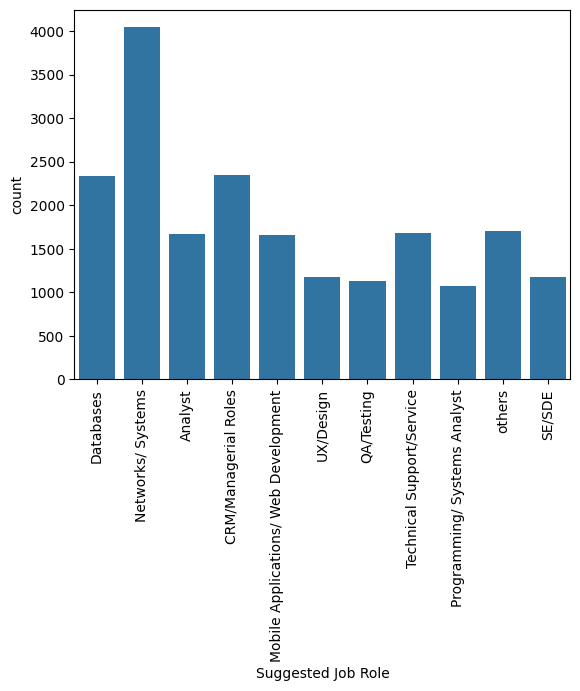

In [53]:
chart = sns.countplot(x=y_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

###### Performing Oversampling 

In [54]:
X3 = sparse.csr_matrix.copy(X2)
y3 = y_trans.copy(deep=True)
X3.shape

(20000, 329)

In [55]:
ros = RandomOverSampler(random_state=42)
X_ovs, y_ovs = ros.fit_resample(X3, y3)

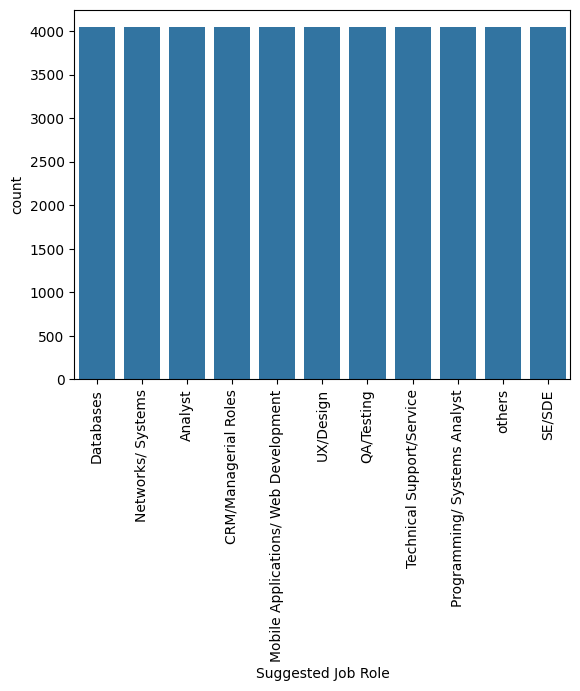

In [56]:
chart = sns.countplot(x=y_ovs)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [57]:
X_ovs.shape

(44473, 329)

In [29]:
y_ovs.shape

(44473,)

## Train Test Split

* 80% Training Data
* 20% Testing Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_ovs,y_ovs,test_size=0.2)

In [31]:
y_train.shape

(35578,)

## Training and Testing the ANN
### MLPClassifier (Multi Layer Perceptron)
###### Model Details:
* Activation: tanh
* Hidden Layers: 50,50,50
* Solver: Adam

In [58]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))

Training Accuracy Score:  0.8956096464107033
Testing Accuracy Score:  0.7047779651489601


#### Classification Report

In [59]:
cm_train = confusion_matrix(clf.predict(X_train),y_train)
cm_test = confusion_matrix(clf.predict(X_test),y_test)
cm_train_cr = classification_report(clf.predict(X_train),y_train)
cm_test_cr = classification_report(clf.predict(X_test),y_test)
print("Train confusion matrix")
print(cm_train)
print("Test confusion matrix")
print(cm_test)
print("Train Classification Report")
print(cm_train_cr)
print("Test Classification Report")
print(cm_test_cr)
print("Train classwise accuracies")
print(cm_train.diagonal()/cm_train.sum(axis=1))
print("Test classwise accuracies")
print(cm_test.diagonal()/cm_test.sum(axis=1))

Train confusion matrix
[[3051   16   55    6   90    3    2    4   10    7   18]
 [  12 2562   84   30  456    4    4    5   33    7   26]
 [  38  102 2664   48  375    8    4    6   22    8   62]
 [  15   39   48 3057  145    6    8    4   13    2    8]
 [  57  355  268   62 1739    6    6    1   78    6   99]
 [  11    7    3    3   20 3206    0    3    3    0    5]
 [   2   11   11   12   36    0 3172    0    5    0   10]
 [   3   32    7    1   28    1    1 3224    9    0   15]
 [  15   49   27   15  156    5    1    5 3001    4   21]
 [   8   25    9    1   37    4    2    0   11 3215    9]
 [  21   37   58    4  149    6    2    2   19    2 2973]]
Test confusion matrix
[[611  31  41   9  70   6   4   3  16   8  24]
 [ 18 376  56  36  96   6  11  11  26   5  15]
 [ 36  44 381  32  84   9   3   4  28   8  38]
 [ 16  47  44 622  71   4   5   8  23   8  16]
 [ 41 105  94  43  91   6   5   2  38   7  55]
 [ 21  32  22  12  55 745   4   3  22   4  13]
 [  6  35  31   5  58   8 792   3 

<AxesSubplot: >

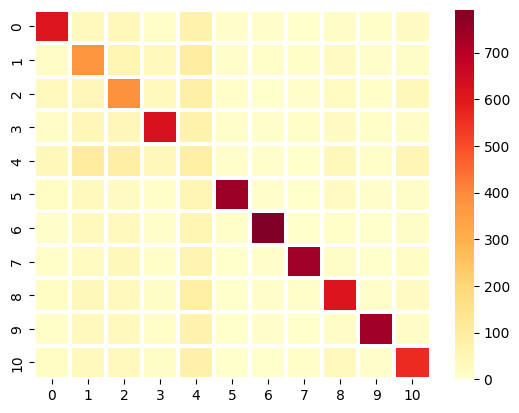

In [60]:
sns.heatmap(cm_test,linewidth=1.5,cmap='YlOrRd')

###### Dumping Trained ANN

In [61]:
import pickle
import os

directory = r"C:\Users\Lenovo\Desktop\Career Rec System\Plan B AI\Model Training"
filename = "final_model.sav"
filepath = os.path.join(directory, filename)

# Make sure the directory exists
os.makedirs(directory, exist_ok=True)

with open(filepath, 'wb') as f:
    pickle.dump(clf, f)

In [62]:
print(len(x.columns))
x.info()

21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Total CGPA                          20000 non-null  float64
 1   Logical quotient rating             20000 non-null  int64  
 2   hackathons                          20000 non-null  int64  
 3   coding skills rating                20000 non-null  int64  
 4   public speaking points              20000 non-null  int64  
 5   can work long time before system?   20000 non-null  object 
 6   self-learning capability?           20000 non-null  object 
 7   certifications                      20000 non-null  object 
 8   reading and writing skills          20000 non-null  object 
 9   memory capability score             20000 non-null  object 
 10  Interested subjects                 20000 non-null  object 
 11  interested career area              20

In [63]:
x.loc[-1]=values = [
    8.3,
    7,
    5,       # this should be an int? For hackathons?
    6,
    7,
    'yes',
    'yes',
    'machine learning',
    'excellent',
    'medium',
    'Management',
    'Business process analyst',
    'higherstudies',
    'Product based',
    'no',
    'Mystery',
    'gentle',
    'Management',
    'salary',
    'smart worker',
    'yes'
]
x.index=x.index+1
x=x.sort_index()
x.shape

(20001, 21)

In [64]:
new_data = OneHotEncoder().fit_transform(x)
new_data = StandardScaler(with_mean=False).fit_transform(new_data)
new_data = sparse.csr_matrix.copy(new_data)
output=clf.predict(new_data[1])
output

array(['Networks/ Systems'], dtype='<U36')

###### Classwise Confidence Score

In [65]:
pred_prob=clf.predict_proba(new_data[1])
pred_prob

array([[6.85945128e-06, 5.38452185e-02, 1.03534558e-02, 2.87453021e-03,
        5.71702058e-01, 4.78171196e-06, 2.57970369e-06, 5.30238620e-20,
        3.61054846e-01, 1.50070165e-09, 1.55669697e-04]])

### De-clubbing the output

In [67]:
if output[0] == 'CRM/Managerial Roles':
    cat=CRM_Managerial_Roles
elif output[0] == 'Analyst':
    cat=Analyst
elif output[0] == 'Mobile Applications/ Web Development':
    cat=Mobile_Applications_Web_Development
elif output[0] == 'QA/Testing':
    cat=QA_Testing
elif output[0] == 'UX/Design':
    cat=UX_Design
elif output[0] == 'Databases':
    cat=Databases
elif output[0] == 'Programming/ Systems Analyst':
    cat=Programming_Systems_Analyst
elif output[0] == 'Networks/ Systems':
    cat=Networks_Systems
elif output[0] == 'SE/SDE':
    cat=SE_SDE
elif output[0] == 'Technical Support/Service':
    cat=Technical_Support_Service
else:
    cat=others

In [68]:
print("suggested job role catogory is: '",output[0],"'")
print()
print("possible job roles in the suggested category are:")
for i in cat:
    print(i)

suggested job role catogory is: ' Networks/ Systems '

possible job roles in the suggested category are:
Network Security Administrator
Network Security Engineer
Network Engineer
Systems Security Administrator
Software Systems Engineer
Information Security Analyst
